In [1]:
!pip install xgboost
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import numpy as np

In [2]:
df_fraud=pd.read_csv("Fraud.csv")

In [3]:
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB






# Missing value.
Data does not have missing value.


In [5]:
print('Does data have any NULL value.')
df_fraud.isna().any()

Does data have any NULL value.


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg      True
newbalanceOrig     True
nameDest           True
oldbalanceDest     True
newbalanceDest     True
isFraud            True
isFlaggedFraud     True
dtype: bool

In [6]:
print('Total number of null value')
df_fraud.isna().sum()

Total number of null value


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

***Type of Transaction in which fraud occur.***

In [7]:
print('Type of transaction in which Fraud has been committed.')
df_fraud.loc[df_fraud.isFraud == 1].type.unique()

Type of transaction in which Fraud has been committed.


array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [8]:
fraud = df_fraud.loc[df_fraud.isFraud == 1]
nonfraud = df_fraud.loc[df_fraud.isFraud == 0]

In [9]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()
print(f"fraud count = {fraudcount} and non fraud count ={nonfraudcount}")

fraud count = 78 and non fraud count =14168


<ipython-input-10-8aa7fa3657d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fraud.corr(),cmap='RdBu',);


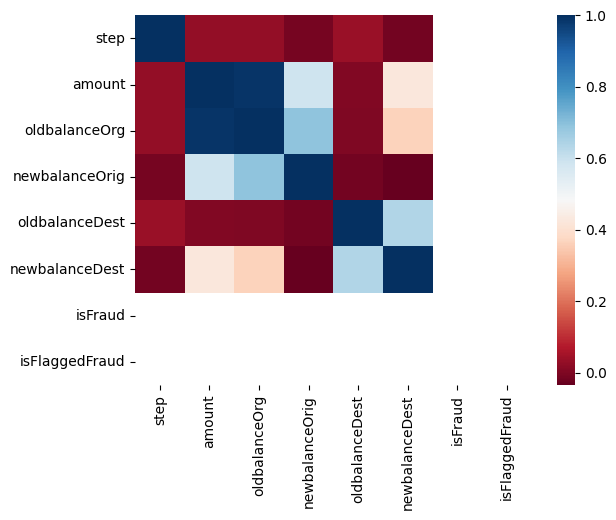

In [10]:
sns.heatmap(fraud.corr(),cmap='RdBu',);




# Feature Selection, lable encoding

Here I am selecting feature like step, type, amount, newbalanceOrig, oldbalanceOrg, oldbalanceDest, newbalanceDest,isFraud which was already avaliable in the dataset and removing the name of origin, destination and isFlaggedFraud as it does not play role in detecting fraud.

I also added two feature errorbalanceOrg, errorbalanceDest beacaue to check the consistency in transaction. It means the sum of amount of money before and after transaction should be equal.

*** What are the key factors that predict fraudulent customer?***

The key factors that predict fradulanet customer are **errorbalanceOrg** and **errorbalanceDest** because these factor are used to check consistency in transaction. We can also give importance to **TYPE** factor as it tells us what are type of transaction in fraud occur the most.
We can use factor like balance, step,origin and destination balance to predict fradulanet customer.


In [11]:
df_fraud['errorbalanceOrg'] = df_fraud.newbalanceOrig + df_fraud.amount - df_fraud.oldbalanceOrg
df_fraud['errorbalanceDest'] = df_fraud.oldbalanceDest + df_fraud.amount - df_fraud.newbalanceDest

In [12]:
df_fraud.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1,inplace=True)


In [ ]:
df_fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,9839.64
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,1864.28
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0,181.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,21363.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,11668.14


Here we are converting categorical value of type into numerical value because our model understand numerical value. So when we are detecting whether a fraud has occur during transaction or not we have to convert type into numerical value using label encoding.

In [13]:
le = LabelEncoder()
df_fraud['type'] = le.fit_transform(df_fraud['type'])
lables=le.classes_
lables

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [14]:
df_fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,9839.64
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,1864.28
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0,0.0,181.00
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,21363.00
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,11668.14


# Model
Here I am using Xgboost Classifier an ensemble method that combines the prediction of multiple model to make stronger classification.

In [15]:
X = df_fraud.drop(['isFraud'],axis=1)
y = df_fraud[['isFraud']]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [ ]:

model = XGBClassifier(max_depth = 3, n_jobs = 4)

model.fit(train_X,train_y)
probablity=model.predict(test_X)
from sklearn.metrics import average_precision_score

print(average_precision_score(test_y,probablity))

0.9902889469128936


 **What kind of prevention should be adopted while company update its infrastructure?**

1. Company should implement strong authentication techniques for user accounts, both internally and externally, such as multi-factor authentication (MFA).

2. There should be consistency check after the transaction to see whether the fraud has occur or not.

3. Educate employees and customer about transaction fraud risks, common attack vectors, and best practices for maintaining security. Conduct regular training sessions to keep employees informed about emerging threats and techniques used by fraudsters.

4. Customer information and transaction details should be encrypted

5. Company should Keep all software, operating systems, and applications up to date with the latest security patches. Regularly applying updates helps address vulnerabilities and weaknesses that attackers can exploit.

6. Company should have plan to catch fraudester  in case of a transaction fraud incident.

7. There should be regular checking in the company to identify and remove vulnerabilities in the infrastructure.

***To check whether the above measures are working or not. ***

1. Company should conduct periodic security test to assess the effectiveness of security controls.

2. Company should compare the number of fraud cases ocuur after updatation in infrastructure and before updation in infrastructure.

3. Monitoring security systems and logs for any signs of suspicious or malicious activity.

4. Perform regular penetration testing or ethical hacking exercises to simulate real-world attack scenarios. Engage skilled professionals to attempt to exploit vulnerabilities in infrastructure and assess the effectiveness of security measures.
















